In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [10]:
def regions_table(sim_df, a_cnt):
    f = sim_df[sim_df['agents']==a_cnt]
    f = f[['features','traits','regions']]
    f = f.groupby(['features','traits']).mean()
    f = f.unstack('traits')
    display(f)
    
    
def usediter_table(sim_df, a_cnt):
    f = sim_df[sim_df['agents']==a_cnt]
    f = f[['features','traits','usediter']]
    f = f.groupby(['features','traits']).mean()
    f = f.unstack('traits')
    display(f)




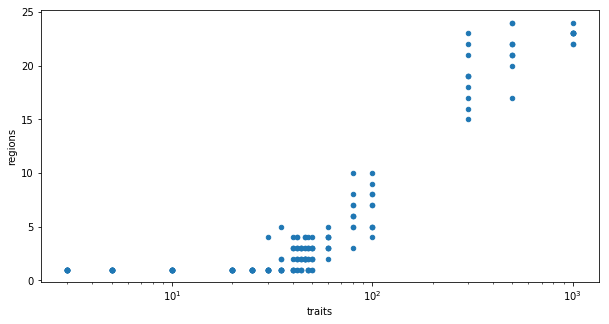

In [10]:
# analýza Axelrod - mřížka

sim_df = pd.read_csv('simul_q25_mrizka.csv')
#f = sim_df[sim_df['features']==20]
#regions_table(f, 16)
#usediter_table(f, 16)
f = sim_df[(sim_df['agents']==25) & (sim_df['features']==20)]
f.plot(kind='scatter', x='traits', y='regions', logx=True, figsize=(10,5))

In [5]:
display(f[f['traits']==100])

,agents,features,traits,regions,usediter,non_zero_edges
340,25,20,100,7,3426,0
341,25,20,100,9,2273,0
342,25,20,100,7,3453,0
343,25,20,100,5,4083,0
344,25,20,100,5,3491,0
345,25,20,100,8,1941,0
346,25,20,100,5,6189,0
347,25,20,100,10,3078,0
348,25,20,100,4,7838,0
349,25,20,100,8,5334,0


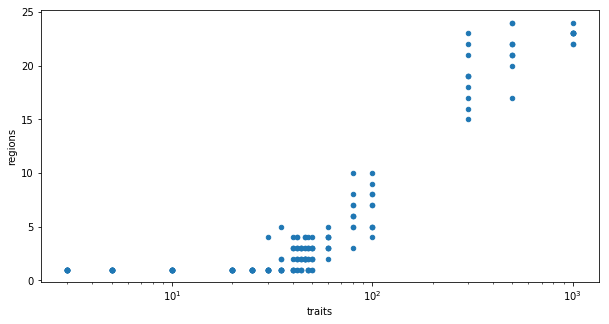

In [6]:
f.plot(kind='scatter',x='traits', y='regions', logx=True, figsize=(10,5))

In [2]:
sim_df = pd.read_csv('small_world.csv')

In [5]:
ff = sim_df.style.set_properties(subset=['traits'], **{'width': '300px'})

In [8]:
display(ff.head(5))

AttributeError: 'Styler' object has no attribute 'head'

In [7]:
display(sim_df.head(5))

,agents,features,traits,regions,usediter,non_zero_edges
0,16,20,3,1,2392,0
1,16,20,3,1,2931,0
2,16,20,3,1,2471,0
3,16,20,3,1,2712,0
4,16,20,3,1,2539,0


In [6]:
sim_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 6 columns):
agents            255 non-null int64
features          255 non-null int64
traits            255 non-null int64
regions           255 non-null int64
usediter          255 non-null int64
non_zero_edges    255 non-null int64
dtypes: int64(6)
memory usage: 12.0 KB


In [5]:
sim_df[(sim_df['agents']==) & (sim_df['features']==2)]['usediter'].mean()

133.88

In [41]:
# vyfiltrování podle stejných features/traits
# zajímá mě graf závislosti průměru z regions na počtu agentů

f = sim_df[(sim_df['traits']==14) & (sim_df['features']==6)]

In [7]:
f

,agents,features,traits,regions,usediter,non_zero_edges
35,25,6,10,1,2863,0
36,25,6,10,1,3458,0
37,25,6,10,2,1244,0
38,25,6,10,1,3003,0
39,25,6,10,1,2612,0
110,36,6,10,2,4205,0
111,36,6,10,1,7098,0
112,36,6,10,1,5289,0
113,36,6,10,1,7682,0
114,36,6,10,1,6758,0


In [8]:
# zgroupování počtu agentů a zprůměrování zbytku
f.groupby('agents').mean()

,features,traits,regions,usediter,non_zero_edges
agents,,,,,
25,6.0,10.0,1.2,2636.0,0.0
36,6.0,10.0,1.2,6206.4,0.0
49,6.0,10.0,1.4,10338.6,0.0
100,6.0,10.0,1.4,49040.2,0.0
144,6.0,10.0,1.0,103917.8,0.0
225,6.0,10.0,1.0,241423.6,0.0


agents
25     2.2
36     3.0
49     1.8
100    1.6
144    1.4
225    1.0
Name: regions, dtype: float64

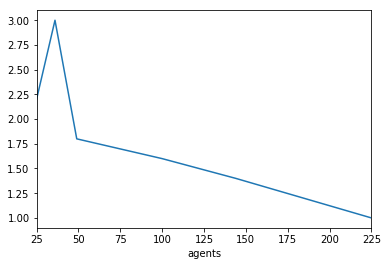

In [42]:
# závislost regionů na počtu agentů
display(f.groupby('agents')['regions'].mean())
f.groupby('agents')['regions'].mean().plot()

In [20]:
f = sim_df.groupby(['features','traits'])['regions'].mean()


In [27]:
f.index.levels[0]

Int64Index([2, 6, 10], dtype='int64', name='features')

features,2,6,10
agents,,,
25,9.84,2.32,1.24
36,13.32,2.04,1.28
49,17.40,1.64,1.12
100,30.52,1.84,1.00
144,40.88,1.36,1.04
225,55.80,1.04,1.00


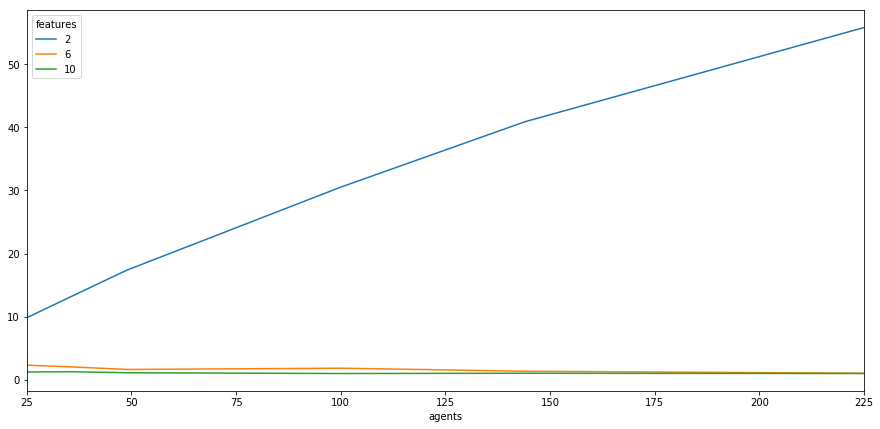

In [36]:
fig, ax = plt.subplots(figsize=(15,7))
display(sim_df.groupby(['agents','features'])['regions'].mean().unstack())
sim_df.groupby(['agents','features']).mean()['regions'].unstack().plot(ax=ax)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

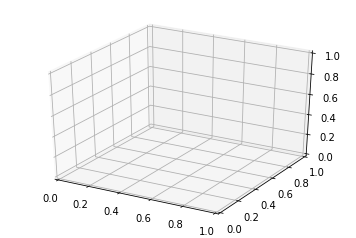

In [28]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(f.index.levels[0], f.index.levels[0], f)
threedee.set_xlabel('Index')
threedee.set_ylabel('H-L')
threedee.set_zlabel('Close')
plt.show()

In [4]:
# přesypání dat, bod 1 v sešitě

def regions_table(sim_df, a_cnt):
    f = sim_df[sim_df['agents']==a_cnt]
    f = f[['features','traits','regions']]
    f = f.groupby(['features','traits']).mean()
    f = f.unstack('traits')
    display(f)


regions_table(sim_df, 100)

#regions_table(sim_df, 36)

#regions_table(sim_df, 100)

#regions_table(sim_df, 225)





#a_cnt = 25

#f1 = sim_df[sim_df['agents']==25]
#f2 = f1[['features','traits','regions']]
#display(f2)
#f22 = f2.groupby(['features','traits']).mean()

#f3 = f22.set_index(['features','traits'])

#f4 = f22.unstack('traits')
#display(f4)
#indexed = sim_df.set_index(['features','traits'])
#indexed.head()

regions          
traits        5    10   15
features                  
5            1.1  1.4  2.8
10           1.0  1.0  1.0
15           1.0  1.0  1.0

In [5]:
def usediter_table(sim_df, a_cnt):
    f = sim_df[sim_df['agents']==a_cnt]
    f = f[['features','traits','usediter']]
    f = f.groupby(['features','traits']).mean()
    f = f.unstack('traits')
    display(f)


usediter_table(sim_df, 100)

#usediter_table(sim_df, 36)

#usediter_table(sim_df, 100)

#usediter_table(sim_df, 225)

usediter                   
traits         5        10        15
features                            
5         34418.7  37040.8   33746.3
10        65244.3  74574.1   80168.8
15        91353.1  99521.8  100000.0

In [6]:
sim_df

,agents,features,traits,regions,usediter,non_zero_edges
0,100,5,5,1,25500,0
1,100,5,5,1,44963,0
2,100,5,5,1,37685,0
3,100,5,5,1,31067,0
4,100,5,5,1,40991,0
5,100,5,5,1,36439,0
6,100,5,5,1,33232,0
7,100,5,5,1,39084,0
8,100,5,5,1,29275,0
9,100,5,5,2,25951,0
